# [S24] Introduction to Machine Learning: Bonus assignment
**Student name:** <font color='red'>Sofia Gamershmidt</font>

**Student email:** <font color='red'>s.gamershmidt@innopolis.university</font>

## Task 1. Baseline model [0pt]

In [45]:
import numpy as np
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import load_model

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
loaded_model = load_model('SofiaGamershmidt.h5')

In [3]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

## Task 2. Self-supervised learning [12pts]

In [4]:
import numpy as np
from keras.datasets import cifar10

(x_train, _), (x_test, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))
x_test = np.reshape(x_test, (len(x_test), 32, 32, 3))

In [5]:
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
input_img = Input(shape=(32, 32, 3))

# Encoder
x = Conv2D(64, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
encoded = Conv2D(16, (3, 3), activation='relu', padding='same')(x)

# Decoder
x = Conv2D(16, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
  5/391 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.3015 - loss: 0.6926

2024-05-01 14:41:50.509409: E tensorflow/core/util/util.cc:131] oneDNN supports DT_INT32 only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 34ms/step - accuracy: 0.5083 - loss: 0.6076 - val_accuracy: 0.7198 - val_loss: 0.5672
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7286 - loss: 0.5656 - val_accuracy: 0.7507 - val_loss: 0.5637
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 34ms/step - accuracy: 0.7475 - loss: 0.5629 - val_accuracy: 0.7668 - val_loss: 0.5618
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 35ms/step - accuracy: 0.7626 - loss: 0.5614 - val_accuracy: 0.7456 - val_loss: 0.5611
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.7709 - loss: 0.5603 - val_accuracy: 0.7793 - val_loss: 0.5612
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.7786 - loss: 0.5592 - val_accuracy: 0.7608 - val_loss: 0.5604
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 15s 37ms/step - accuracy: 0.7796 - loss: 0.5588 - val_accuracy: 0.7855 - val_loss: 0.5593
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.7843 - loss: 0.5580 - val_accurac

In [6]:
autoencoder.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d (UpSampling2D)    │ (None, 16, 16, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_1 (UpSampling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 3)      │           867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 98,123 (383.30 KB)

 Trainable params: 32,707 (127.76 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 65,416 (255.54 KB)

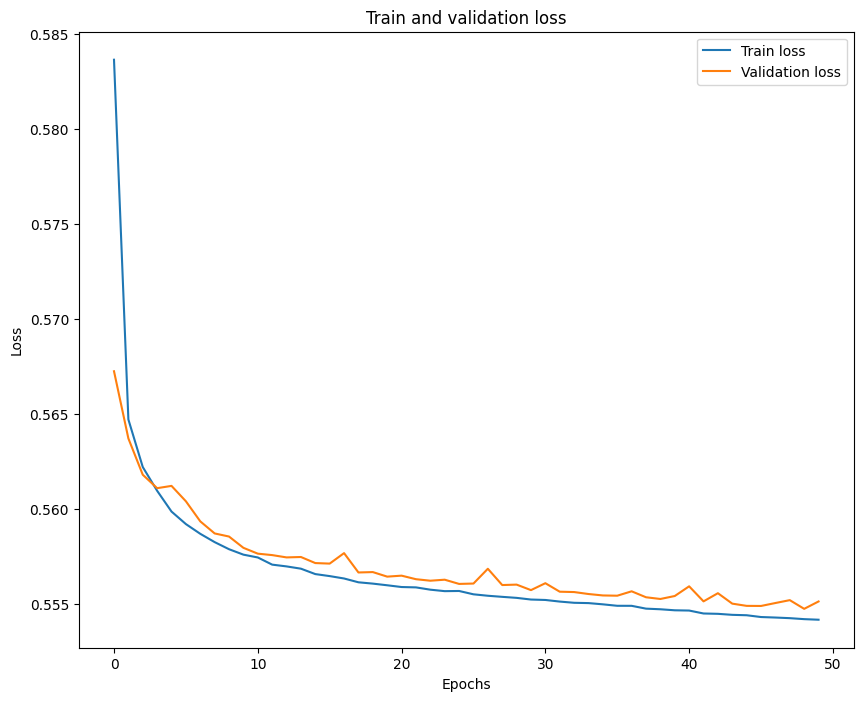

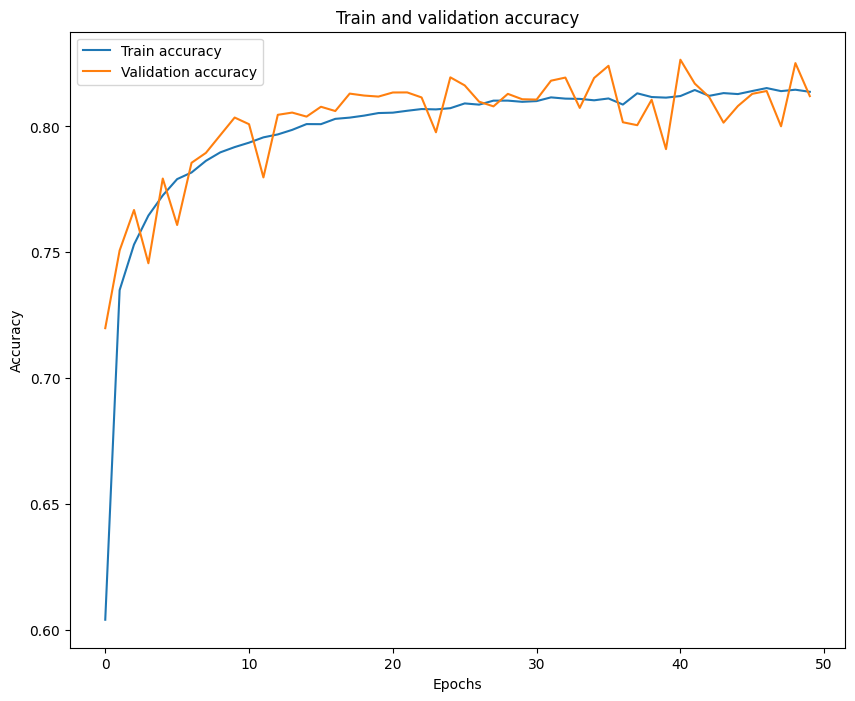

In [7]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10, 8))
plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Train and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(train_acc, label='Train accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
(x_train, y_train), (_, _) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.

x_train, _, y_train, _ = train_test_split(x_train, y_train, train_size=0.1, stratify=y_train)

x_train = np.reshape(x_train, (len(x_train), 32, 32, 3))


In [9]:
import numpy as np
from keras.datasets import cifar10
from sklearn.utils import shuffle
from keras.utils import to_categorical

(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, _, y_train, _ = train_test_split(x_train_full, y_train_full, train_size=0.1, stratify=y_train_full)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

x_train, y_train = shuffle(x_train, y_train)

encoder_output = autoencoder.layers[6].output


for layer in autoencoder.layers[:7]:
    layer.trainable = False


x = Flatten()(encoder_output)
x = Dense(128, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)


classification_model = Model(inputs=autoencoder.input, outputs=predictions)


classification_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


history = classification_model.fit(x_train, y_train,
                                  epochs=50,
                                  batch_size=128,
                                  shuffle=True,
                                  validation_data=(x_test, y_test))


loss, accuracy = classification_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.1502 - loss: 2.3641 - val_accuracy: 0.2297 - val_loss: 2.1264
Epoch 2/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.2509 - loss: 2.0875 - val_accuracy: 0.3036 - val_loss: 1.9622
Epoch 3/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.2931 - loss: 1.9636 - val_accuracy: 0.3323 - val_loss: 1.8902
Epoch 4/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.3163 - loss: 1.9064 - val_accuracy: 0.3389 - val_loss: 1.8603
Epoch 5/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3390 - loss: 1.8764 - val_accuracy: 0.3260 - val_loss: 1.8658
Epoch 6/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3605 - loss: 1.8073 - val_accuracy: 0.2863 - val_loss: 1.9033
Epoch 7/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3531 - loss: 1.7985 - val_accuracy: 0.3335 - val_loss: 1.8486
Epoch 8/50
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.3556 - loss: 1.7932 - val_accuracy: 0.3361 - v

In [10]:
classification_model.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 16)       │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 16)       │         2,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 424,672 (1.62 MB)

 Trainable params: 132,490 (517.54 KB)

 Non-trainable params: 27,200 (106.25 KB)

 Optimizer params: 264,982 (1.01 MB)

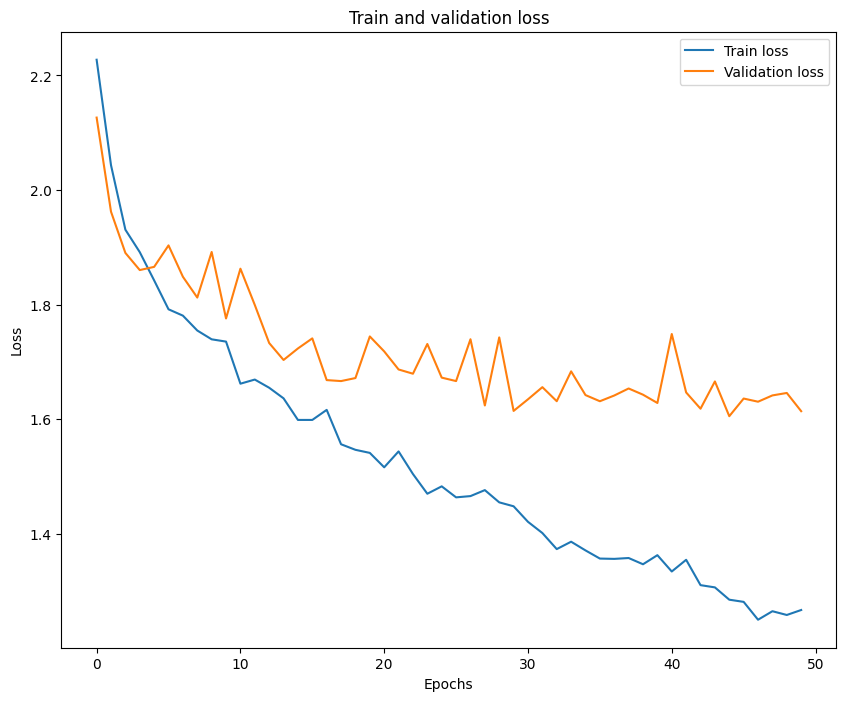

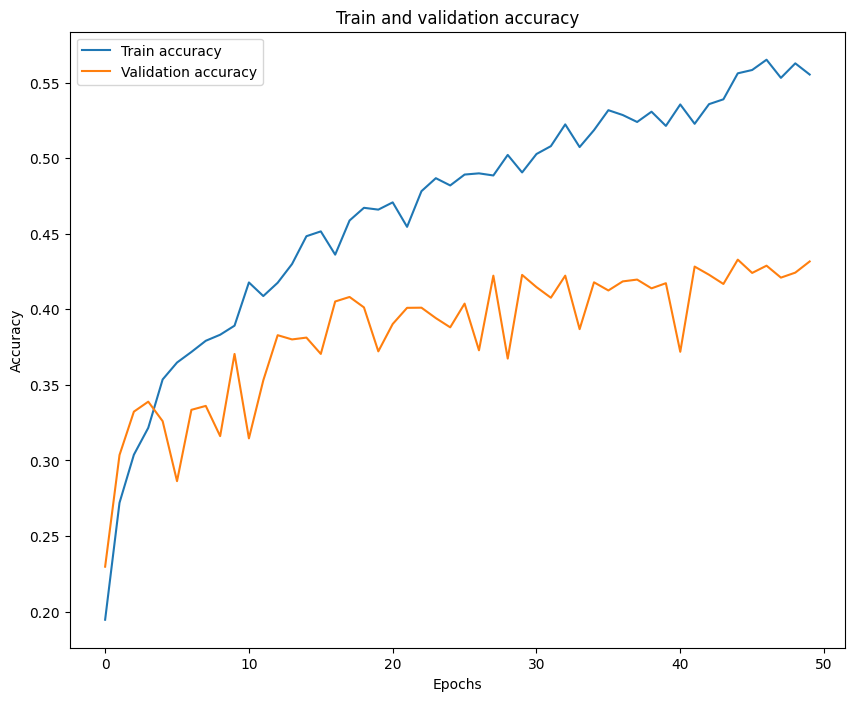

In [11]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10, 8))
plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Train and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(train_acc, label='Train accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


## Task 3. Auxiliary learning [12 pts]

In [12]:
input_shape = (32, 32, 3)
num_classes = 10

inputs = Input(shape=input_shape)

conv1 = Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')(inputs)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(pool1)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

flatten = Flatten()(pool2)
dense_cls1 = Dense(128, activation='relu')(flatten)
output_cls = Dense(num_classes, activation='softmax', name='classification')(dense_cls1)

upsample = UpSampling2D(size=(2, 2))(pool2)
conv3 = Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same')(upsample)
upsample2 = UpSampling2D(size=(2, 2))(conv3)
output_recon = Conv2D(3, kernel_size=(3, 3), activation='sigmoid', padding='same', name='reconstruction')(upsample2)

model = Model(inputs=inputs, outputs=[output_cls, output_recon])

def combined_metric(y_true_cls, y_pred_cls, y_true_recon, y_pred_recon):
    cls_accuracy = categorical_accuracy(y_true_cls, y_pred_cls)
    recon_mse = mean_squared_error(y_true_recon, y_pred_recon)
    return cls_accuracy + recon_mse

model.compile(optimizer=Adam(), 
              loss={'classification': 'categorical_crossentropy', 'reconstruction': 'mean_squared_error'}, 
              metrics={'classification': ['accuracy'], 
                       'reconstruction': ['mean_absolute_error']})
model.summary()


Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 32, 32,    │        896 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 16, 16,    │          0 │ conv2d_6[0][0]    │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 16, 16,    │     18,496 │ max_pooling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_3     │ (None, 8, 8, 64)  │          0 │ conv2d_7[0][0]    │
│ (MaxPooling2D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_2     │ (None, 16, 16,    │          0 │ max_pooling2d_3[… │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 4096)      │          0 │ max_pooling2d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 16, 16,    │     36,928 │ up_sampling2d_2[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 128)       │    524,416 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_3     │ (None, 32, 32,    │          0 │ conv2d_8[0][0]    │
│ (UpSampling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ classification      │ (None, 10)        │      1,290 │ dense_2[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ reconstruction      │ (None, 32, 32, 3) │      1,731 │ up_sampling2d_3[… │
│ (Conv2D)            │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 583,757 (2.23 MB)

 Trainable params: 583,757 (2.23 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history = model.fit(x_train, {'classification': y_train, 'reconstruction': x_train},
                    batch_size=64,
                    epochs=10,
                    validation_data=(x_test, {'classification': y_test, 'reconstruction': x_test}))


Epoch 1/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - classification_accuracy: 0.1926 - loss: 2.2352 - reconstruction_mean_absolute_error: 0.1652 - val_classification_accuracy: 0.3615 - val_loss: 1.7783 - val_reconstruction_mean_absolute_error: 0.0940
Epoch 2/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - classification_accuracy: 0.3939 - loss: 1.6950 - reconstruction_mean_absolute_error: 0.0911 - val_classification_accuracy: 0.4062 - val_loss: 1.6596 - val_reconstruction_mean_absolute_error: 0.0798
Epoch 3/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - classification_accuracy: 0.4516 - loss: 1.5351 - reconstruction_mean_absolute_error: 0.0842 - val_classification_accuracy: 0.4722 - val_loss: 1.4732 - val_reconstruction_mean_absolute_error: 0.0733
Epoch 4/10
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - classification_accuracy: 0.5129 - loss: 1.3724 - reconstruction_mean_absolute_error: 0.0788 - val_classification_accuracy: 0.4607 - val_loss: 1.5037 - val_reconstruction_mean_absolute_error: 0.0

In [14]:
print(history.history.keys())

dict_keys(['classification_accuracy', 'loss', 'reconstruction_mean_absolute_error', 'val_classification_accuracy', 'val_loss', 'val_reconstruction_mean_absolute_error'])


Classification Loss: [0.36149999499320984, 0.40619999170303345, 0.4722000062465668, 0.46070000529289246, 0.4925999939441681, 0.48989999294281006, 0.5160999894142151, 0.5235000252723694, 0.5351999998092651, 0.5583999752998352]
Reconstruction Loss: [0.09398629516363144, 0.07980927079916, 0.0733182355761528, 0.08567897230386734, 0.07082179933786392, 0.07661077380180359, 0.06952837109565735, 0.06512938439846039, 0.07335017621517181, 0.07090561836957932]
Total Loss: [2.0554888248443604, 1.656569242477417, 1.4932156801223755, 1.3900014162063599, 1.3092783689498901, 1.2253735065460205, 1.1360886096954346, 1.0583453178405762, 0.9922873377799988, 0.934541642665863]


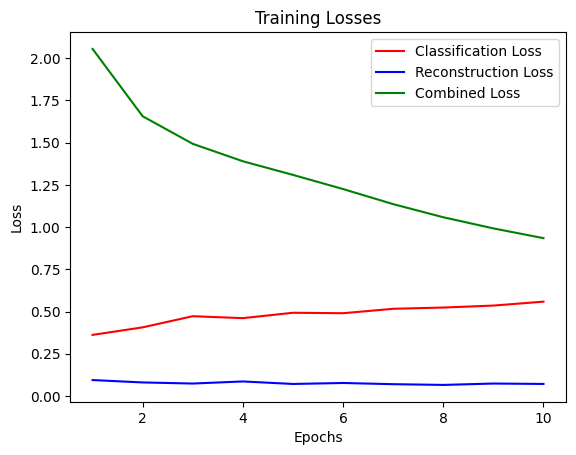

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Train Classification Accuracy: 0.7242
Test Classification Accuracy: 0.5584


In [15]:
from sklearn.metrics import accuracy_score

# Collect loss values
classification_loss = history.history['val_classification_accuracy']
reconstruction_loss = history.history['val_reconstruction_mean_absolute_error']
total_loss = history.history['loss']

# Print or visualize the loss values
print("Classification Loss:", classification_loss)
print("Reconstruction Loss:", reconstruction_loss)
print("Total Loss:", total_loss)

classification_loss = history.history['val_classification_accuracy']
reconstruction_loss = history.history['val_reconstruction_mean_absolute_error']
total_loss = history.history['loss']

epochs = range(1, len(total_loss) + 1)
plt.plot(epochs, classification_loss, 'r', label='Classification Loss')
plt.plot(epochs, reconstruction_loss, 'b', label='Reconstruction Loss')
plt.plot(epochs, total_loss, 'g', label='Combined Loss')
plt.title('Training Losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

train_classification_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(model.predict(x_train)[0], axis=1))
test_classification_accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(model.predict(x_test)[0], axis=1))

print("Train Classification Accuracy:", train_classification_accuracy)
print("Test Classification Accuracy:", test_classification_accuracy)


## Task 4. Ensemble [6pts]

In [16]:
for layer in loaded_model.layers:
    layer.trainable = False
for layer in classification_model.layers:
    layer.trainable = False
for layer in model.layers:
    layer.trainable = False   

In [42]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, _, y_train, _ = train_test_split(x_train_full, y_train_full, train_size=0.1, stratify=y_train_full)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
y_test = np.argmax(y_test, axis=1)
x_train, y_train = shuffle(x_train, y_train)

In [35]:
preds1 = loaded_model.predict(x_train)
preds2 = classification_model.predict(x_train)
preds3 = model.predict(x_train)

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [18]:
preds1.shape

(10000, 10)

In [19]:
preds2.shape


(10000, 10)

In [32]:
preds3[0].shape

(10000, 10)

In [36]:
stacked_predictions = np.hstack((preds1, preds2, preds3[0]))

meta_model = Sequential([
    Dense(32, activation='relu', input_shape=(30,)),  
    Dropout(0.5),
    Dense(10, activation='softmax') 
])


X_meta = np.concatenate([preds1, preds2, preds3[0]], axis=1)

y_train_categorical = np.argmax(y_train, axis=1)

meta_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = meta_model.fit(X_meta, y_train_categorical, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10


/home/sofia/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2338 - loss: 2.1988 - val_accuracy: 0.8360 - val_loss: 1.6301
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 624us/step - accuracy: 0.7235 - loss: 1.4762 - val_accuracy: 0.9780 - val_loss: 0.7949
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 609us/step - accuracy: 0.8795 - loss: 0.8253 - val_accuracy: 0.9820 - val_loss: 0.3462
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 622us/step - accuracy: 0.9069 - loss: 0.5260 - val_accuracy: 0.9820 - val_loss: 0.1830
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - accuracy: 0.9237 - loss: 0.3891 - val_accuracy: 0.9820 - val_loss: 0.1172
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9428 - loss: 0.3029 - val_accuracy: 0.9830 - val_loss: 0.0869
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.9488 - loss: 0.2563 - val_accuracy: 0.9860 - val_loss: 0.0702
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - accuracy: 0.9515 - loss: 0.2239 - val_accuracy:

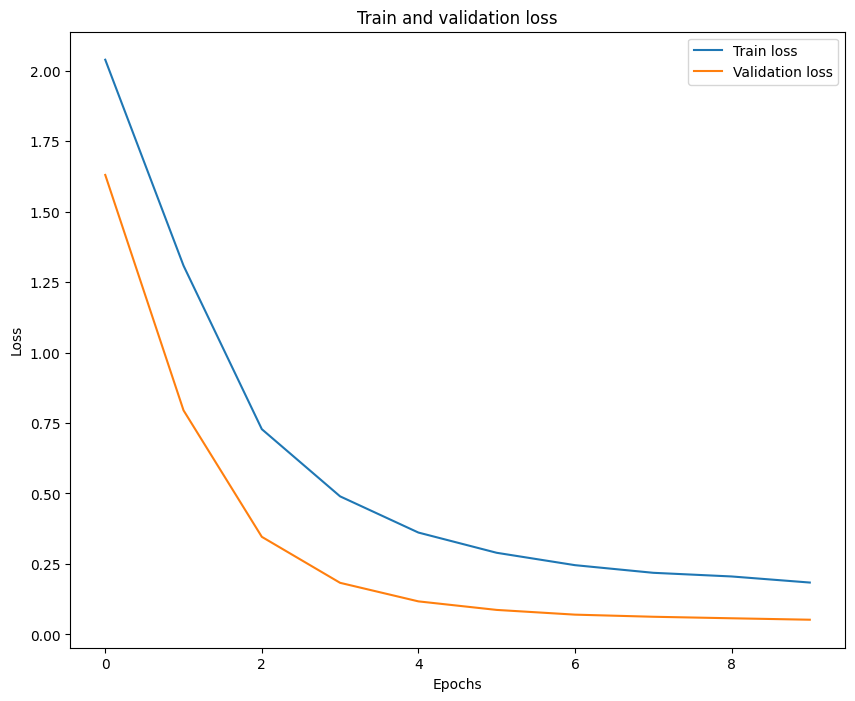

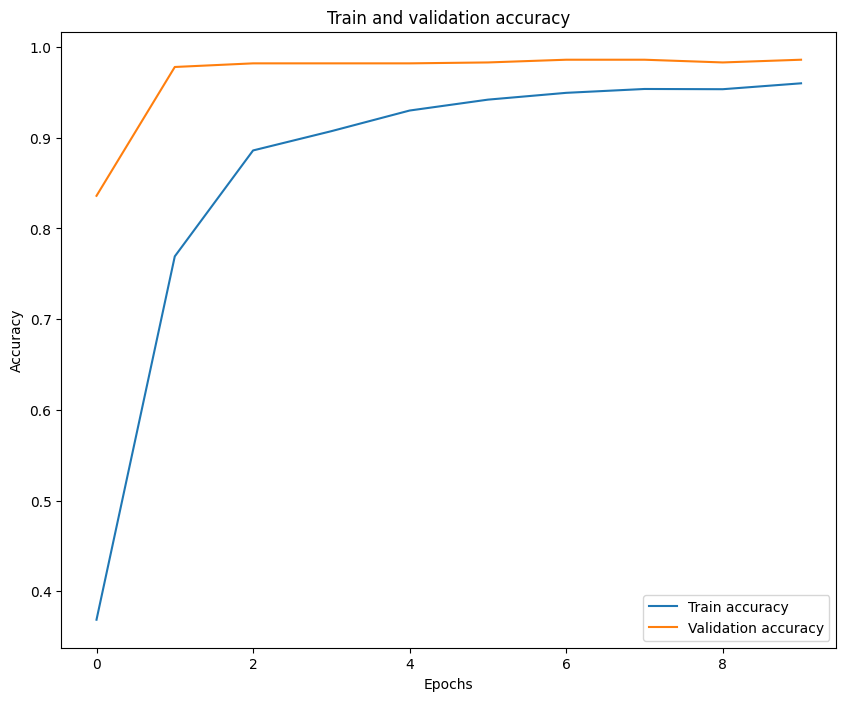

In [37]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.figure(figsize=(10, 8))
plt.plot(train_loss, label='Train loss')
plt.plot(val_loss, label='Validation loss')
plt.title('Train and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 8))
plt.plot(train_acc, label='Train accuracy')
plt.plot(val_acc, label='Validation accuracy')
plt.title('Train and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [81]:
import time
from sklearn.metrics import f1_score, recall_score
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
baseline_accuracy = loaded_model.evaluate(x_test, y_test)
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, _, y_train, _ = train_test_split(x_train_full, y_train_full, train_size=0.1, stratify=y_train_full)

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
x_train, y_train = shuffle(x_train, y_train)
self_supervised_accuracy = classification_model.evaluate(x_test, y_test)
auxiliary_learning_accuracy = model.evaluate(x_test, y_test)

preds1 = loaded_model.predict(x_test)
start_time = time.time()
num_iterations = 10
for _ in range(num_iterations):
    _ = loaded_model.predict(x_test[:1]) 
end_time = time.time()
baseline_inference_time = (end_time - start_time) / num_iterations


preds2 = classification_model.predict(x_test)
for _ in range(num_iterations):
    _ = classification_model.predict(x_test[:1]) 
end_time = time.time()
self_supervised_inference_time = (end_time - start_time) / num_iterations


preds3 = model.predict(x_test)
for _ in range(num_iterations):
    _ = model.predict(x_test[:1]) 
end_time = time.time()
auxiliary_learning_inference_time = (end_time - start_time) / num_iterations

X_meta = np.concatenate([preds1, preds2, preds3[0]], axis=1)
y_test = np.argmax(y_test, axis=1)
ensemble_accuracy = meta_model.evaluate(X_meta, y_test)
for _ in range(num_iterations):
    _ = model.predict(x_test[:1]) 
end_time = time.time()
ensemble_learning_inference_time = (end_time - start_time) / num_iterations

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8322 - loss: 0.5323
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4299 - loss: 1.6173
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - classification_accuracy: 0.5613 - loss: 1.2928 - reconstruction_mean_absolute_error: 0.0000e+00
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━

In [72]:
baseline_accuracy[1]

0.8310999870300293

In [83]:
# Create summary table
print("| Model              | Achieved Accuracy | Model Size (parameters) | Inference Time (s) |")
print("|--------------------|-------------------|-------------------------|--------------------|")
print(f"| Baseline           | {baseline_accuracy[1]:.2f}              | {loaded_model.count_params()}                 | {baseline_inference_time:.2f}               |")
print(f"| Self-supervised    | {self_supervised_accuracy[1]:.2f}              | {classification_model.count_params()}                  | {self_supervised_inference_time:.2f}               |")
print(f"| Auxiliary Learning | {auxiliary_learning_accuracy[1]:.2f}              | {model.count_params()}                  | {auxiliary_learning_inference_time:.2f}               |")
print(f"| Ensemble           | {ensemble_accuracy[1]:.2f}              | {meta_model.count_params()}                    | {ensemble_learning_inference_time:.2f}               |")


| Model              | Achieved Accuracy | Model Size (parameters) | Inference Time (s) |
|--------------------|-------------------|-------------------------|--------------------|
| Baseline           | 0.83              | 2171178                 | 0.03               |
| Self-supervised    | 0.43              | 159690                  | 0.16               |
| Auxiliary Learning | 0.56              | 583757                  | 0.34               |
| Ensemble           | 0.83              | 1322                    | 0.38               |
